##Solar power prediction using linear regression model

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [2]:
# load the dataset
df = pd.read_csv('dataset/dataset.csv') 
df.head()


,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [3]:
df.shape

(4213, 21)

In [4]:
df.info

<bound method DataFrame.info of       temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                          2.17                               31   
1                          2.31                               27   
2                          3.65                               33   
3                          5.82                               30   
4                          7.73                               27   
...                         ...                              ...   
4208                       8.69                               66   
4209                       7.57                               90   
4210                       7.27                               90   
4211                       8.25                               81   
4212                       8.00                               80   

      mean_sea_level_pressure_MSL  total_precipitation_sfc  \
0                          1035.0                      0.0   
1                          

In [5]:
df.describe()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,...,4213.000000,4213.000000,4213.000000,4213.00000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,15.068111,51.361025,1019.337812,0.031759,0.002808,34.056990,14.458818,20.023499,21.373368,387.759036,...,195.078452,18.978483,191.166862,16.36319,192.447911,20.583489,50.837490,59.980947,169.167651,1134.347313
std,8.853677,23.525864,7.022867,0.170212,0.038015,42.843638,30.711707,36.387948,38.013885,278.459293,...,106.626782,11.999960,108.760021,9.88533,106.516195,12.648899,26.638965,19.857711,64.568385,937.957247
min,-5.350000,7.000000,997.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.540000,0.000000,1.120000,0.00000,1.120000,0.720000,3.755323,17.727761,54.379093,0.000595
25%,8.390000,32.000000,1014.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.400000,...,153.190000,10.140000,130.240000,9.18000,148.220000,11.160000,29.408181,45.291631,114.136600,231.700450
50%,14.750000,48.000000,1018.100000,0.000000,0.000000,8.700000,0.000000,0.000000,0.000000,381.810000,...,191.770000,16.240000,187.770000,14.49000,187.990000,18.000000,47.335557,62.142611,163.241650,971.642650
75%,21.290000,70.000000,1023.600000,0.000000,0.000000,100.000000,9.000000,10.000000,10.000000,599.860000,...,292.070000,26.140000,292.040000,21.97000,288.000000,27.000000,69.197492,74.346737,225.085620,2020.966700
max,34.900000,100.000000,1046.800000,3.200000,1.680000,100.000000,100.000000,100.000000,100.000000,952.300000,...,360.000000,66.880000,360.000000,61.11000,360.000000,84.960000,121.635920,128.415370,289.045180,3056.794100


In [6]:
df.isnull().sum()

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.columns

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth',
       'generated_power_kw'],
      dtype='object')

In [9]:
import matplotlib.pyplot as plt

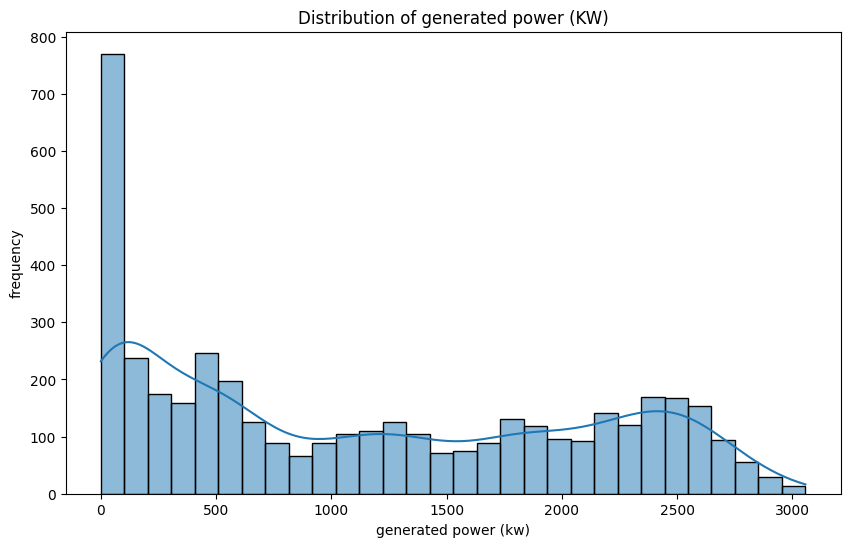

In [10]:
#plot distribution of power
plt.figure(figsize=(10,6))
sns.histplot(df['generated_power_kw'], bins=30, kde=True)
plt.title('Distribution of generated power (KW)')
plt.xlabel('generated power (kw)')
plt.ylabel('frequency')
plt.show()

In [11]:
###EDA

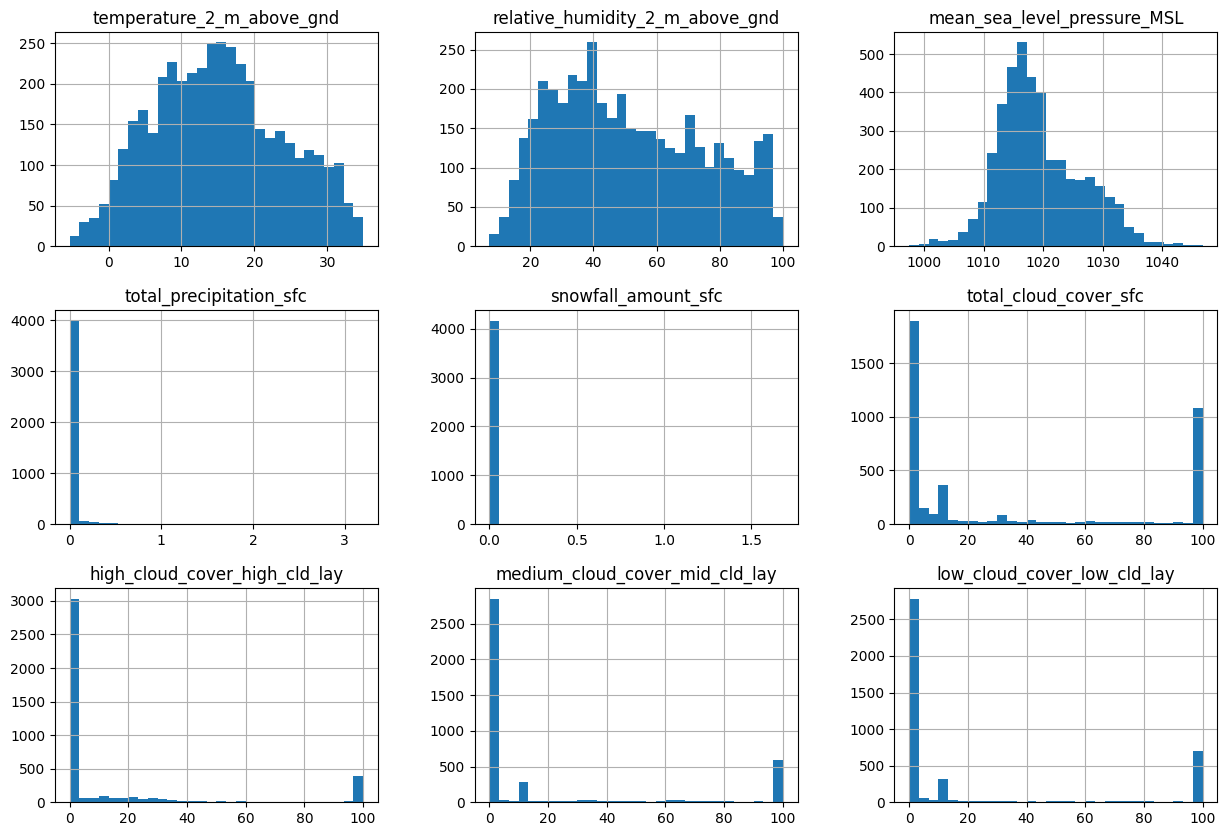

In [12]:
df[df.columns[:9]].hist(bins=30 , figsize=(15,10))
plt.show()

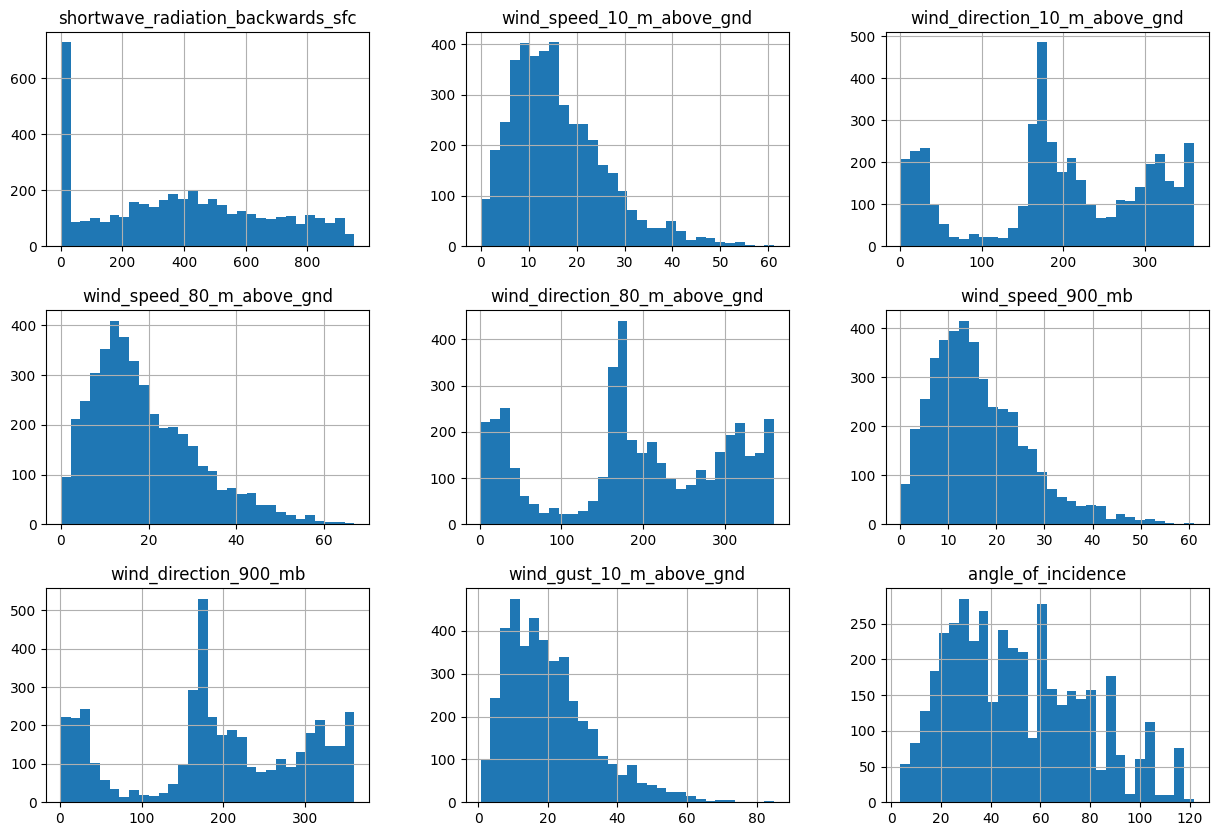

In [13]:
df[df.columns[9:18]].hist(bins=30 , figsize=(15,10))
plt.show()

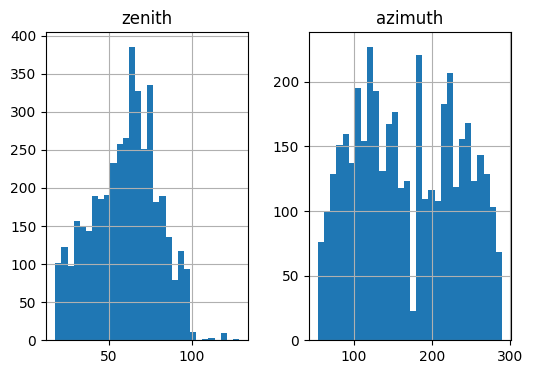

In [14]:
df[df.columns[18:20]].hist(bins=30 , figsize=(6,4))
plt.show()

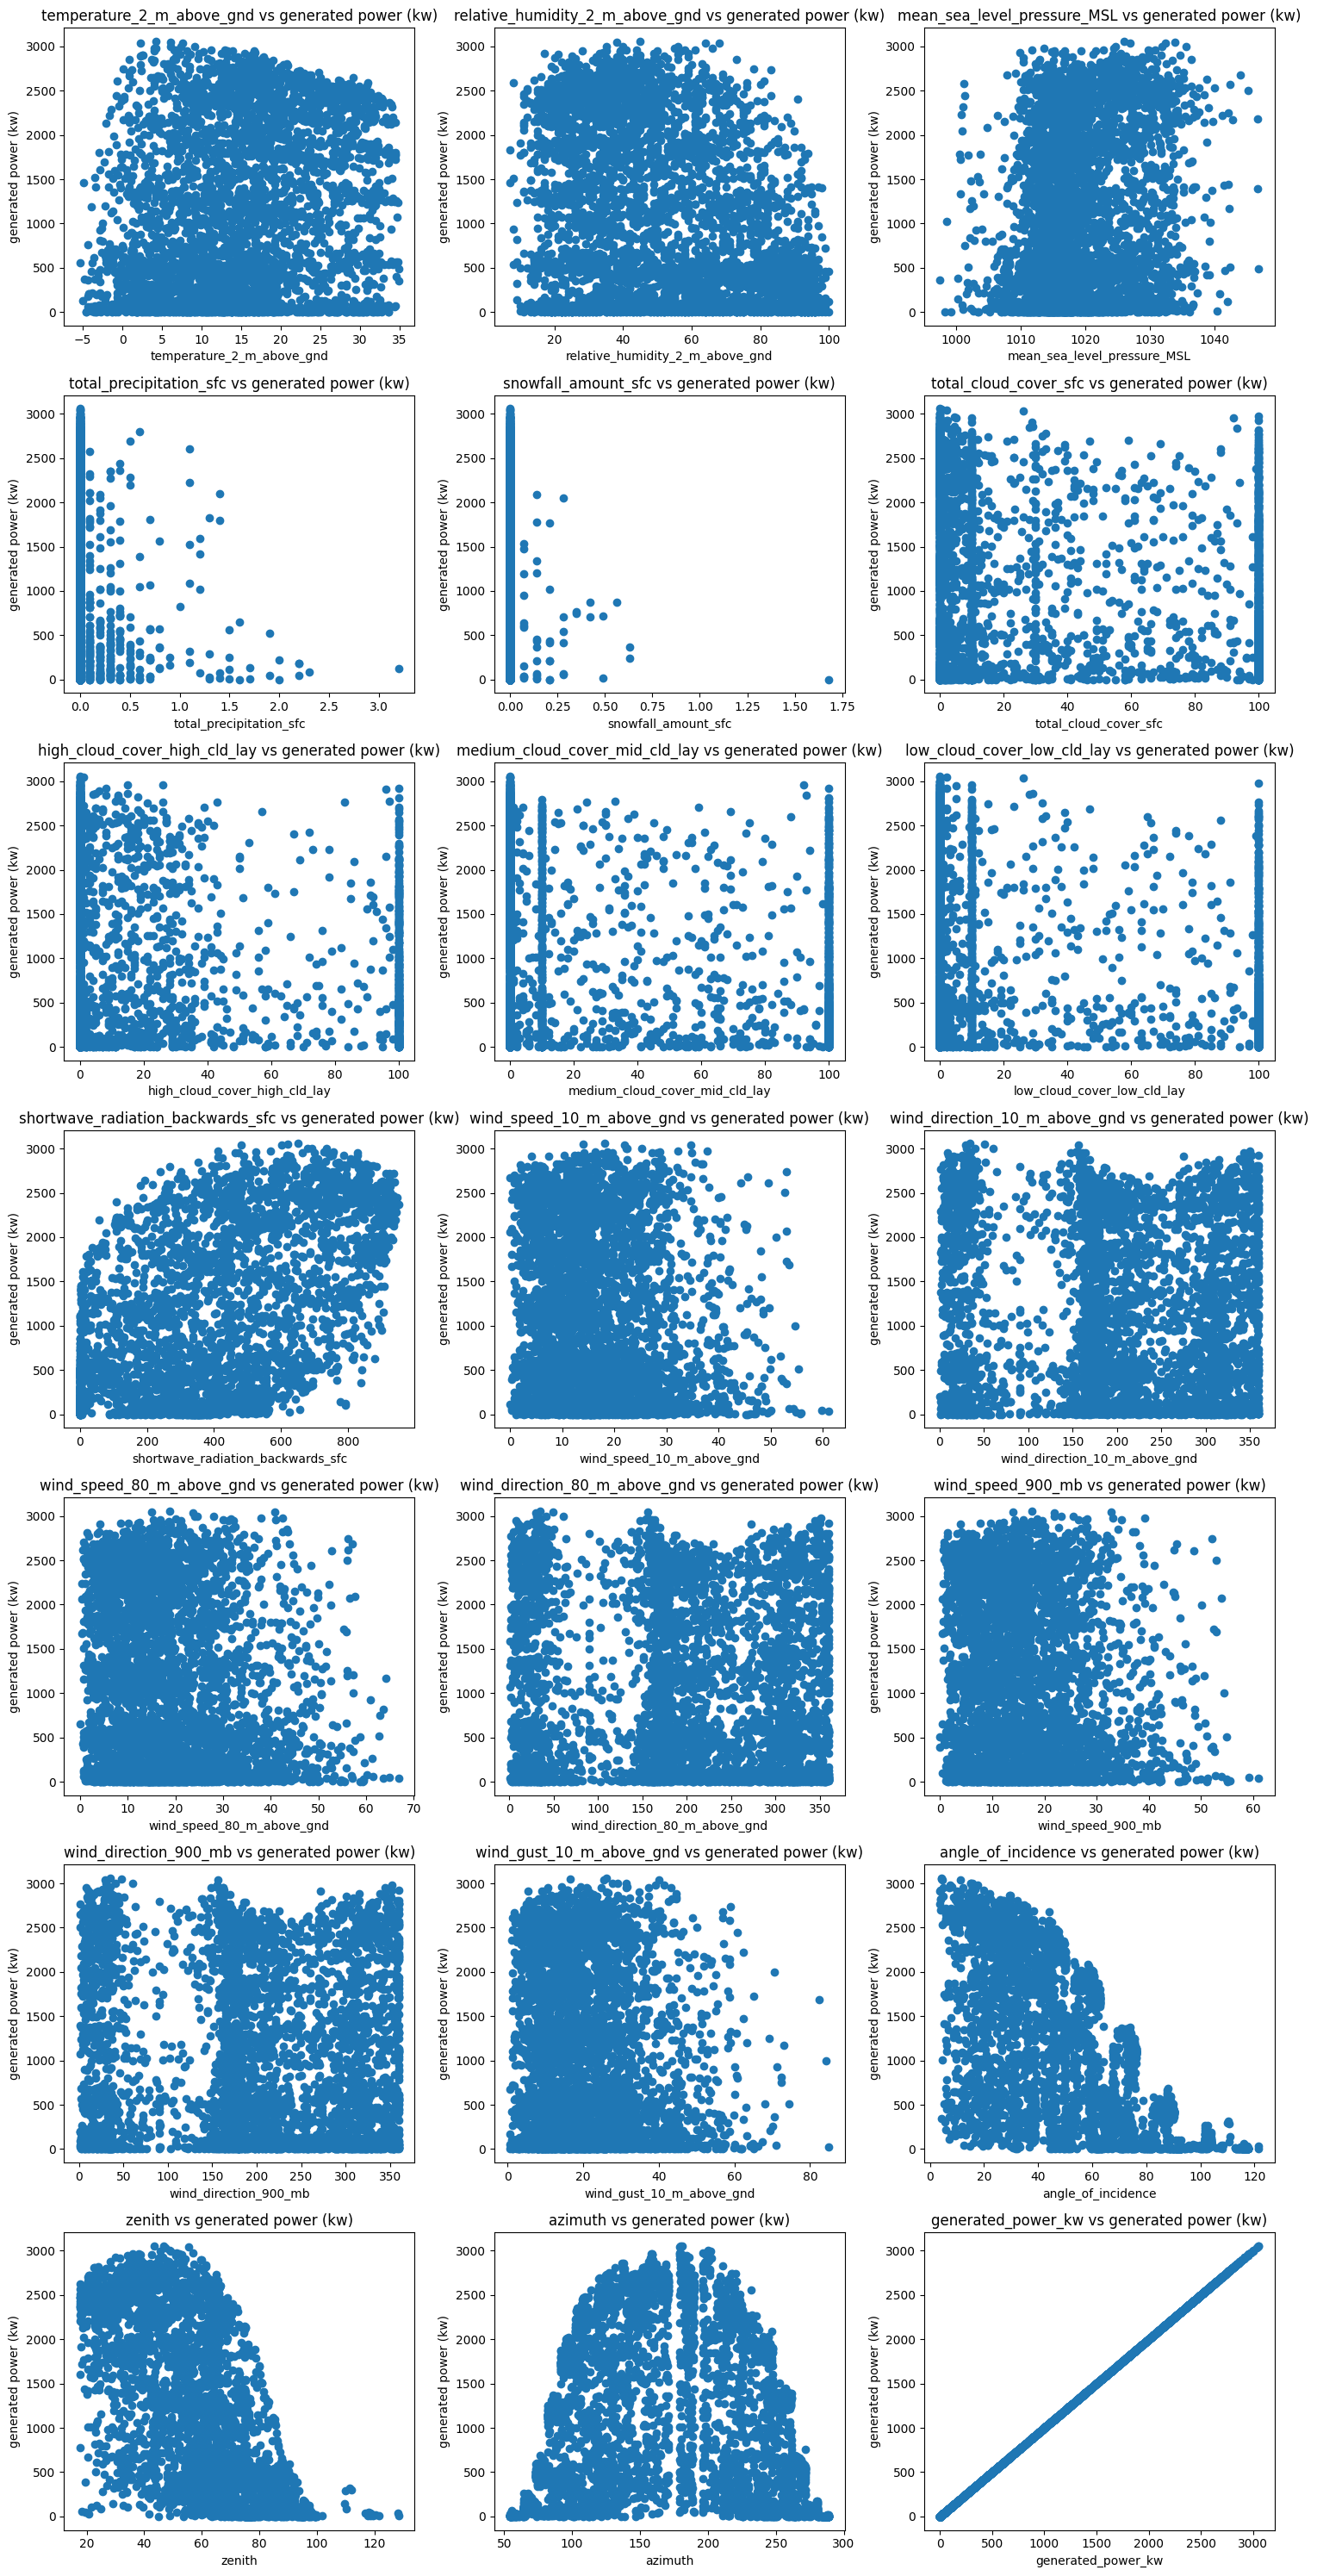

In [15]:
#bivariate analysis
#scatter plot for target feature
plt.figure(figsize=(15,30))
for i,column in enumerate(df.columns):
    plt.subplot(7 , 3, i+1)
    plt.scatter(df[column],df['generated_power_kw'])
    plt.title(f'{column} vs generated power (kw)')
    plt.xlabel(column)
    plt.ylabel('generated power (kw)')
plt.tight_layout()
plt.show()

In [16]:
df.corr()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
temperature_2_m_above_gnd,1.000000,-0.771704,-0.402240,-0.083137,-0.121422,-0.326641,-0.019522,-0.100980,-0.381876,0.665755,...,0.051393,-0.244869,0.086630,-0.198107,0.043233,-0.188264,-0.090173,-0.545646,0.381797,0.217280
relative_humidity_2_m_above_gnd,-0.771704,1.000000,0.100529,0.168660,0.113987,0.402895,0.056452,0.135347,0.490402,-0.721754,...,0.008902,0.212868,-0.019408,0.135464,0.021068,0.144807,0.268460,0.513748,-0.525760,-0.336783
mean_sea_level_pressure_MSL,-0.402240,0.100529,1.000000,-0.159098,-0.053871,-0.151995,-0.014646,-0.129812,-0.162043,-0.188387,...,-0.119867,-0.131442,-0.161020,-0.145696,-0.125234,-0.189266,-0.075619,0.268111,-0.137872,0.150551
total_precipitation_sfc,-0.083137,0.168660,-0.159098,1.000000,0.184497,0.223678,0.076255,0.262367,0.282748,-0.130358,...,0.005234,0.052376,0.007131,0.044797,0.003216,0.066701,-0.020965,-0.023408,0.005749,-0.118442
snowfall_amount_sfc,-0.121422,0.113987,-0.053871,0.184497,1.000000,0.112646,-0.026356,0.042867,0.151609,-0.073499,...,0.039734,0.093156,0.041246,0.100405,0.041716,0.093060,-0.012497,0.033554,0.008426,-0.049508
total_cloud_cover_sfc,-0.326641,0.402895,-0.151995,0.223678,0.112646,1.000000,0.442865,0.712077,0.746225,-0.345089,...,0.055057,0.183732,0.039671,0.174510,0.057816,0.212142,-0.003426,0.136249,-0.037427,-0.334338
high_cloud_cover_high_cld_lay,-0.019522,0.056452,-0.014646,0.076255,-0.026356,0.442865,1.000000,0.593300,0.024703,-0.089620,...,0.017688,0.090049,0.018228,0.078204,0.020897,0.092842,-0.033840,0.031766,0.020790,-0.147723
medium_cloud_cover_mid_cld_lay,-0.100980,0.135347,-0.129812,0.262367,0.042867,0.712077,0.593300,1.000000,0.236716,-0.199843,...,0.016954,0.088972,0.021935,0.076192,0.017195,0.079627,-0.035511,0.046719,0.014802,-0.227834
low_cloud_cover_low_cld_lay,-0.381876,0.490402,-0.162043,0.282748,0.151609,0.746225,0.024703,0.236716,1.000000,-0.336751,...,0.040060,0.156204,0.021782,0.153578,0.039875,0.193846,0.013421,0.120854,-0.054328,-0.288066
shortwave_radiation_backwards_sfc,0.665755,-0.721754,-0.188387,-0.130358,-0.073499,-0.345089,-0.089620,-0.199843,-0.336751,1.000000,...,-0.076530,-0.077090,-0.051670,0.028929,-0.081545,0.017212,-0.576921,-0.801892,0.549296,0.556148


<Axes: >

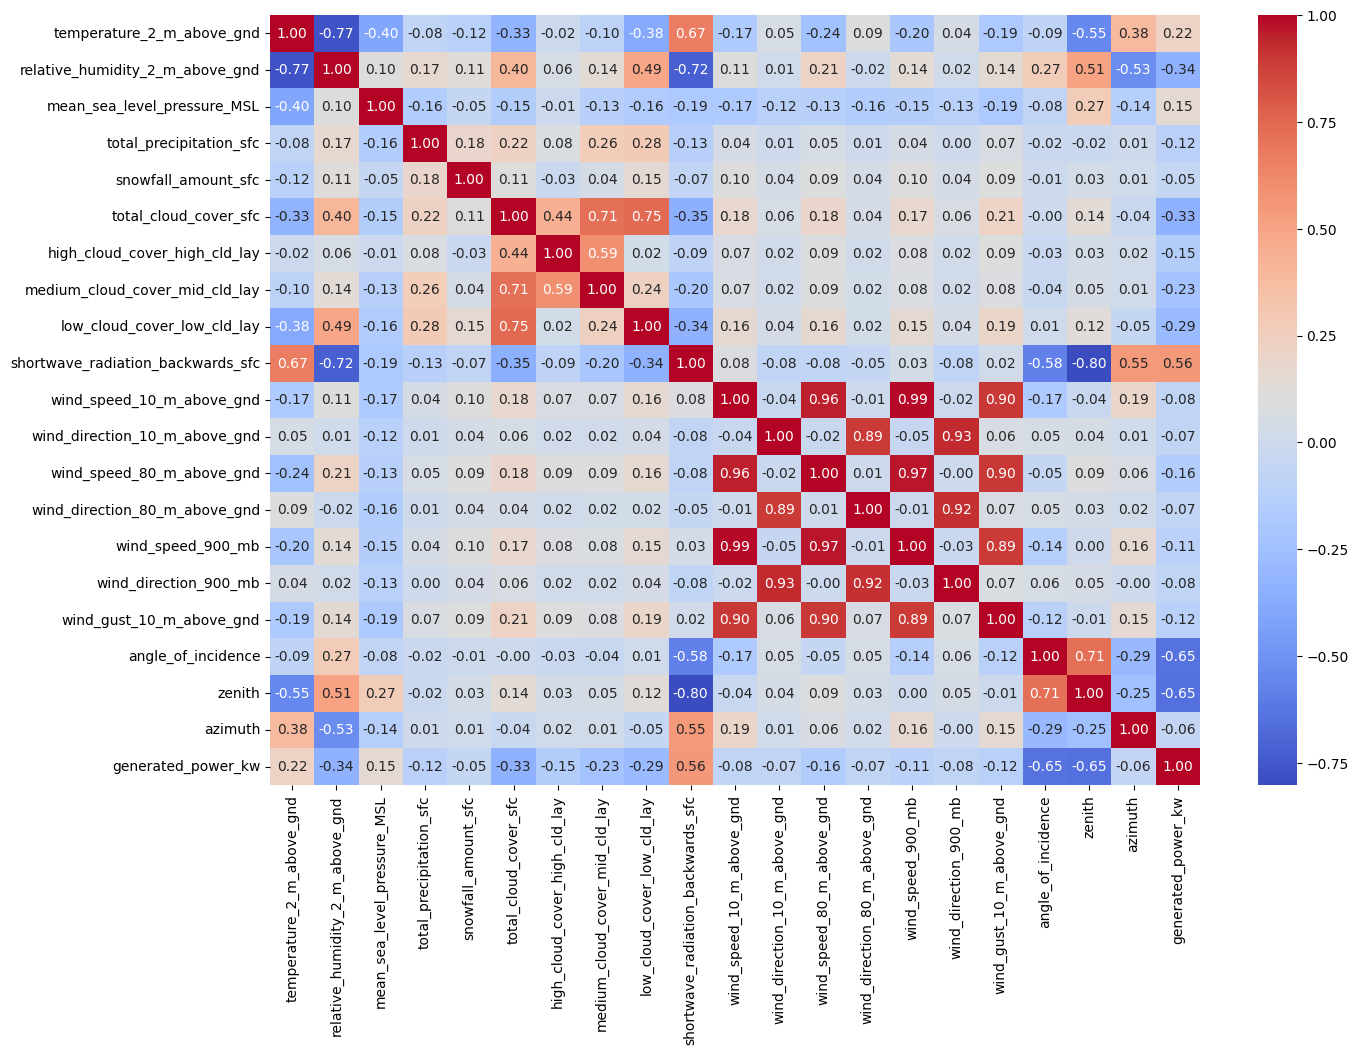

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True ,fmt='.2f')

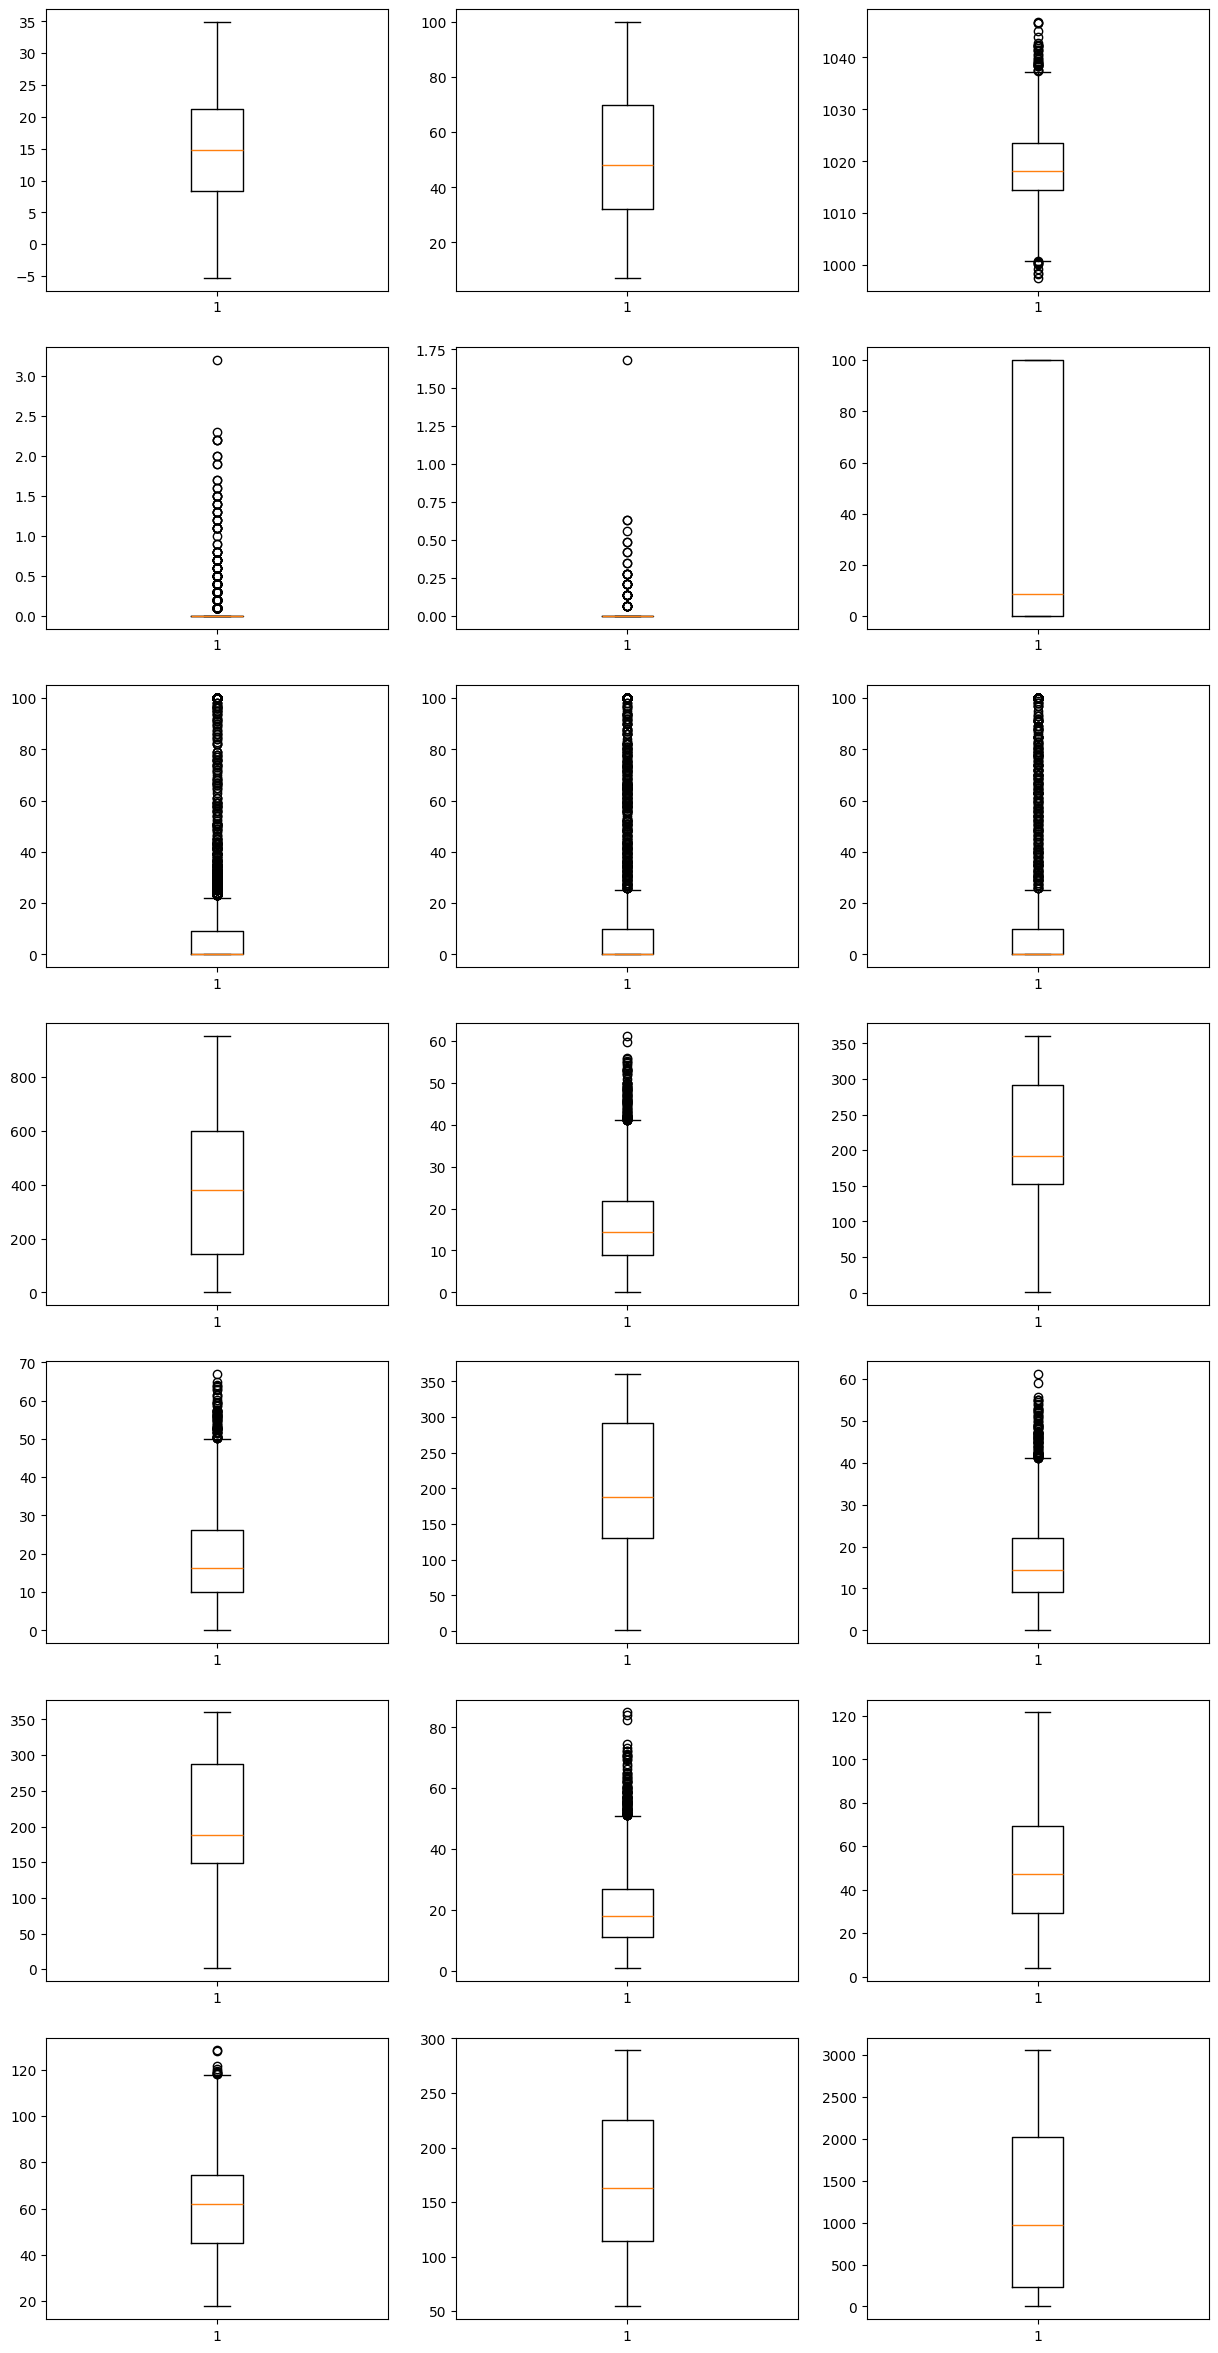

In [18]:
#outliers
plt.figure(figsize=(15,30))
for i,column in enumerate(df.columns):
    plt.subplot(7 , 3, i+1)
    plt.boxplot(df[column])
plt.show()


In [20]:
pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 4.2 MB/s eta 0:00:03
   --------- ------------------------------ 2.6/11.1 MB 8.4 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/11.1 MB 8.1 MB/s eta 0:00:01
   ------------------------ --------------- 6.8/11.1 MB 9.8 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.1 MB 9.7 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.1 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 8.5 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 8.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/43.6 MB ? eta -:--:--
   - -------------------------------------- 1.3/43.6 MB 7.4 MB/s eta 0:00:06
   --- ------------------------------------ 3.4/43.6 MB 8.4 MB/s eta 0:00:05
   ----- ---------------------------------- 6.0/43.6 MB 10.0 MB/s eta 0:00:04
   ------ 


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [22]:
X = df.drop(columns=['generated_power_kw'])  
y = df['generated_power_kw']     

In [23]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)


LinearRegression()

In [26]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)


In [27]:
# Calculate Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 257589.05769408224
R-squared Score: 0.7180084563489013


In [28]:

# Model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)



                                   Coefficient
temperature_2_m_above_gnd           -81.470466
relative_humidity_2_m_above_gnd     -99.841645
mean_sea_level_pressure_MSL         111.850268
total_precipitation_sfc              -0.631124
snowfall_amount_sfc                  12.584215
total_cloud_cover_sfc               -62.786503
high_cloud_cover_high_cld_lay       -38.546706
medium_cloud_cover_mid_cld_lay      -42.072188
low_cloud_cover_low_cld_lay         -51.184064
shortwave_radiation_backwards_sfc   344.558599
wind_speed_10_m_above_gnd           161.871221
wind_direction_10_m_above_gnd        31.983184
wind_speed_80_m_above_gnd           108.602471
wind_direction_80_m_above_gnd        17.274138
wind_speed_900_mb                  -296.701885
wind_direction_900_mb               -27.847469
wind_gust_10_m_above_gnd            -38.538994
angle_of_incidence                 -400.990678
zenith                             -153.429592
azimuth                            -399.385451


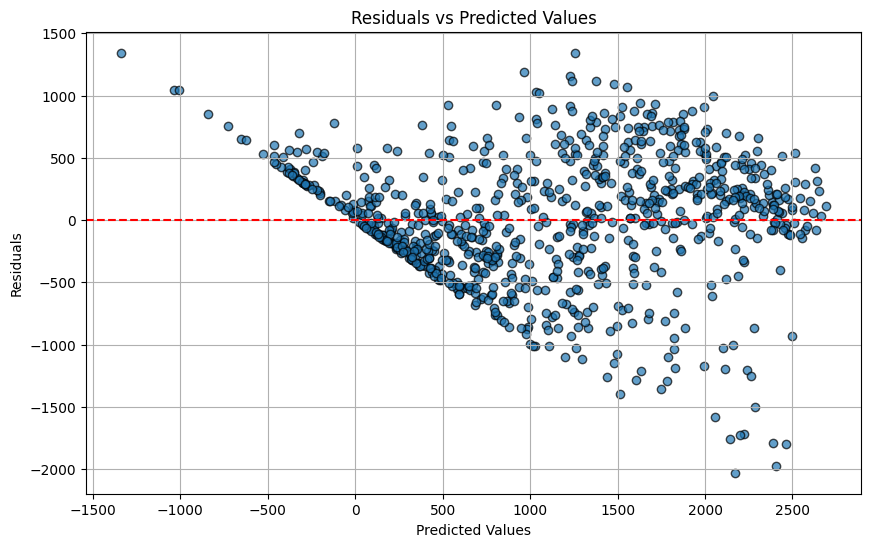

In [29]:
import matplotlib.pyplot as plt

# Residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.7, edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()
